<a href="https://colab.research.google.com/github/fleurdeliane/llama_agent/blob/main/RAG_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh ##download ollama
import subprocess
import threading
import asyncio
import time

def start_ollama():
  process = subprocess.Popen("ollama serve", shell=True)

def run_ollama_async():
  thread = threading.Thread(target=start_ollama)
  thread.start()

run_ollama_async()

time.sleep(10)  # 等待 10 秒

!ollama run llama3:8b
#!ollama list

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
pulling manifest ⠋ pulling manifest ⠹ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠦ pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏    0 B/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏  29 KB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   0% ▕▏ 4.7 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   1% ▕▏  36 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   1% ▕▏  56 MB/4.7 GB                  pulling manifest 
pulling 6a0746a1ec1a...   

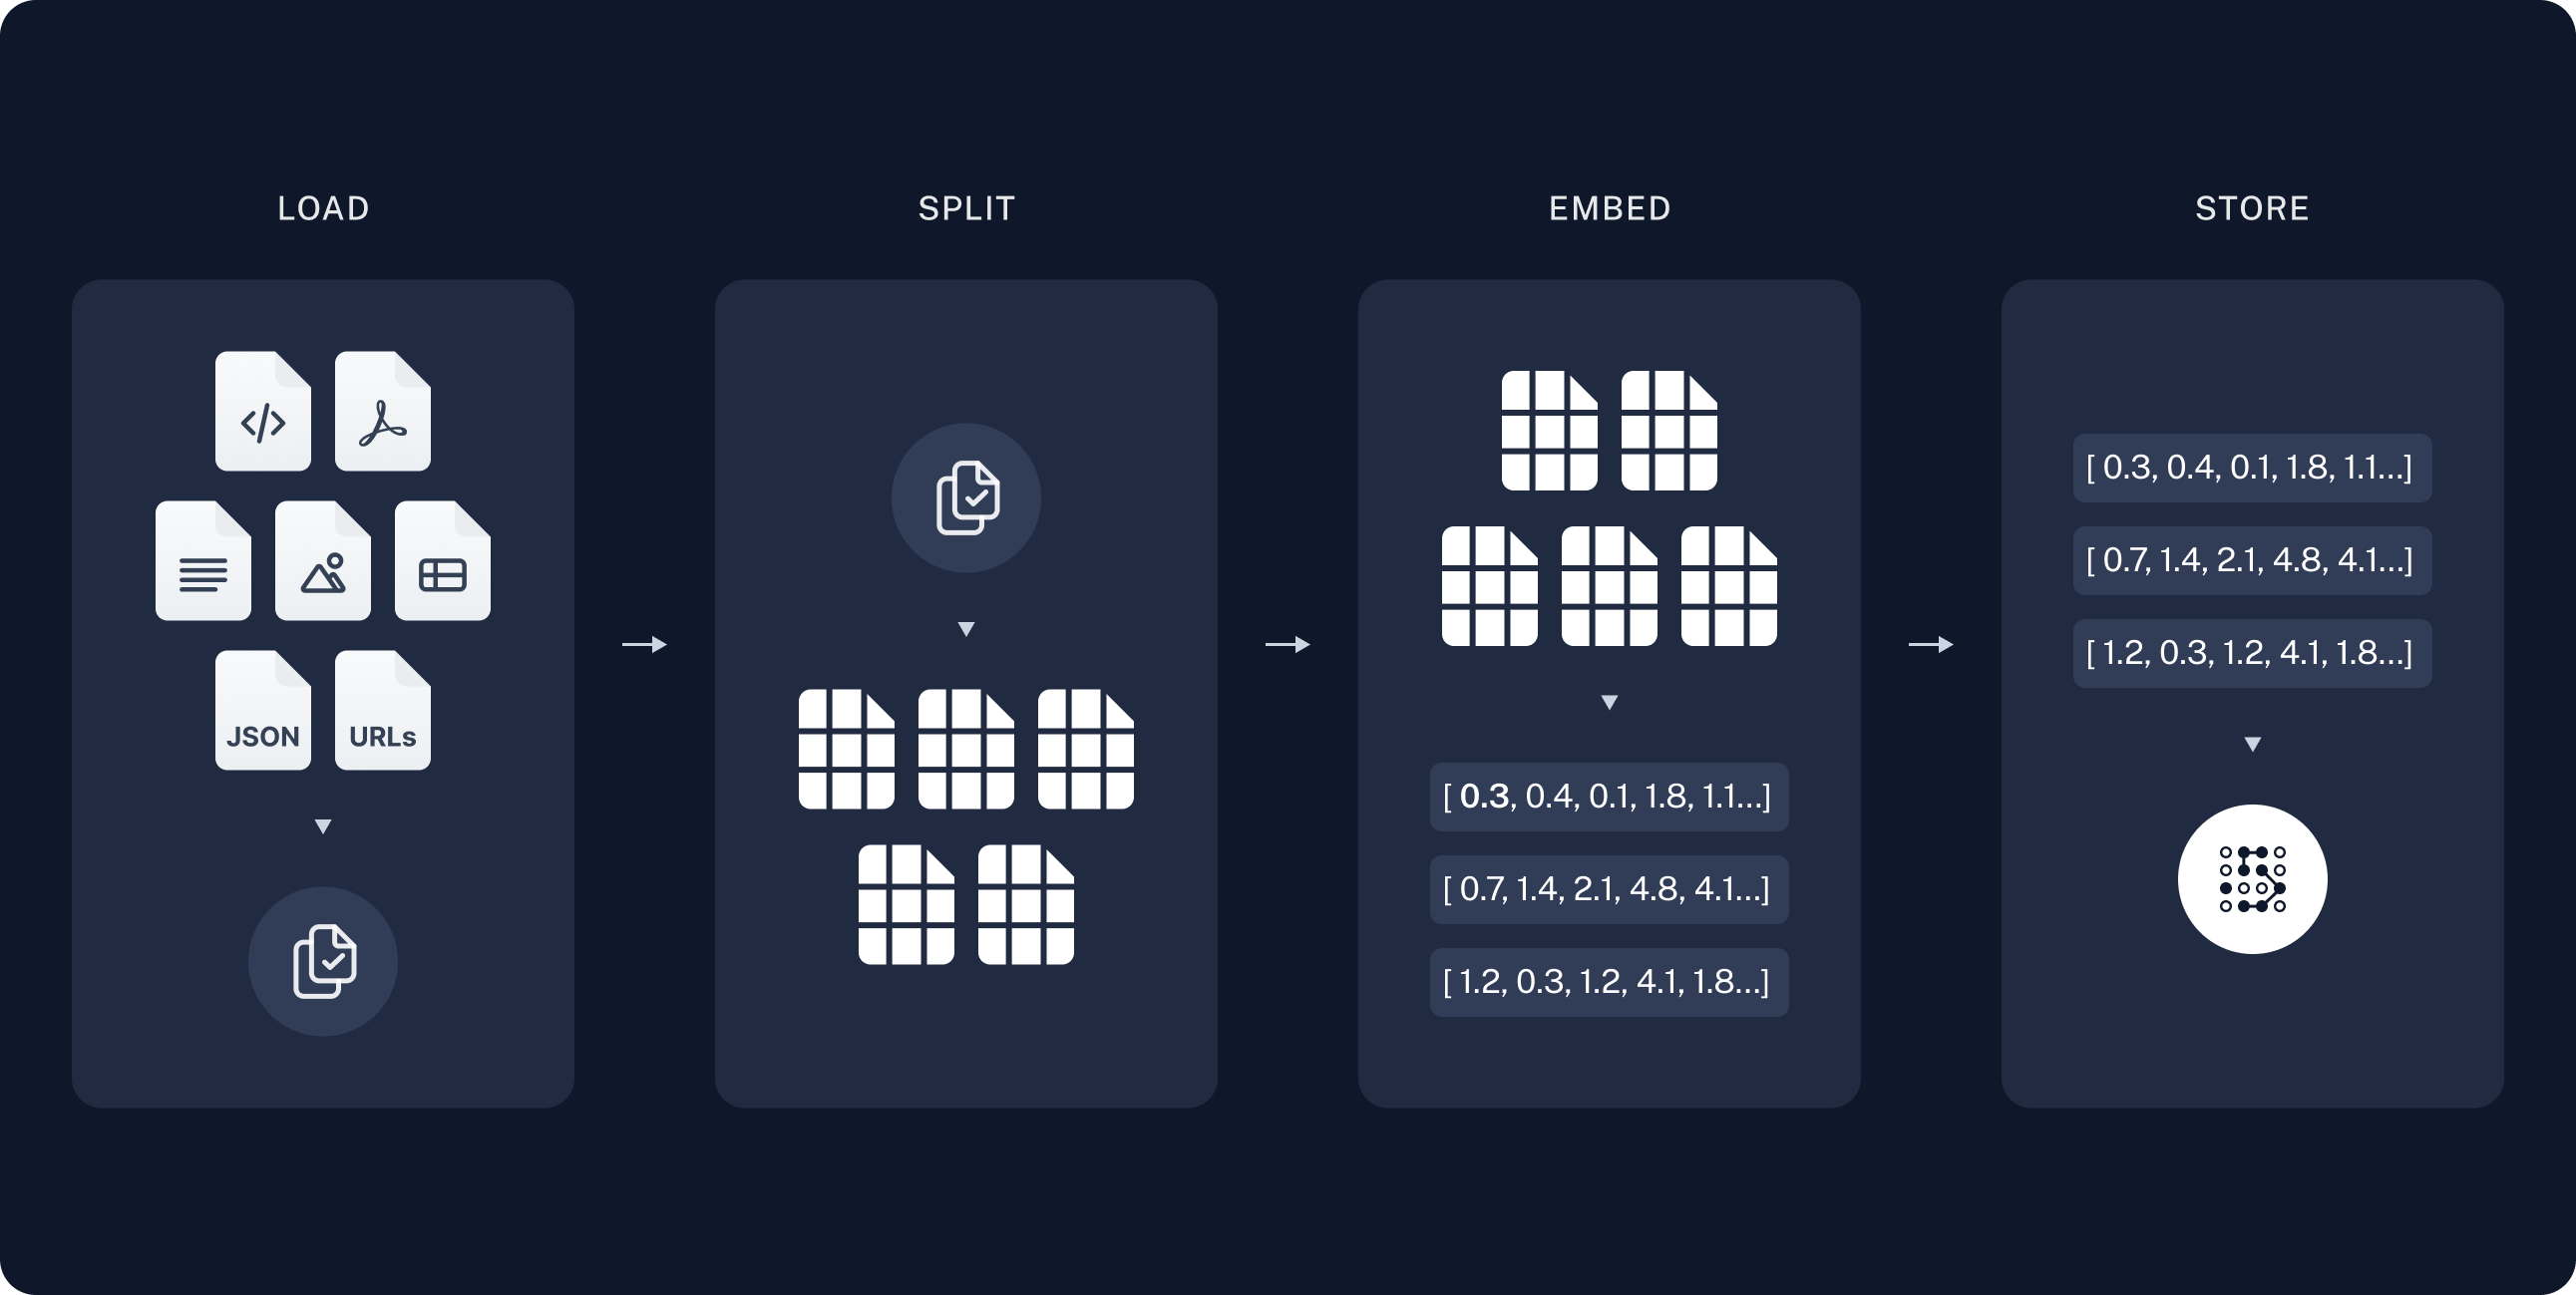

Indexing  索引
* Load: First we need to load our data. This is done with Document Loaders.
* Split: Text splitters break large Documents into smaller chunks. This is useful both for indexing data and passing it into a model, as large chunks are harder to search over and won't fit in a model's finite context window.
* Store: We need somewhere to store and index our splits, so that they can be searched over later. This is often done using a VectorStore and Embeddings model.

Retrieval and generation  检索和生成
* Retrieve: Given a user input, relevant splits are retrieved from storage using a Retriever.
* Generate: A ChatModel / LLM produces an answer using a prompt that includes both the question with the retrieved data


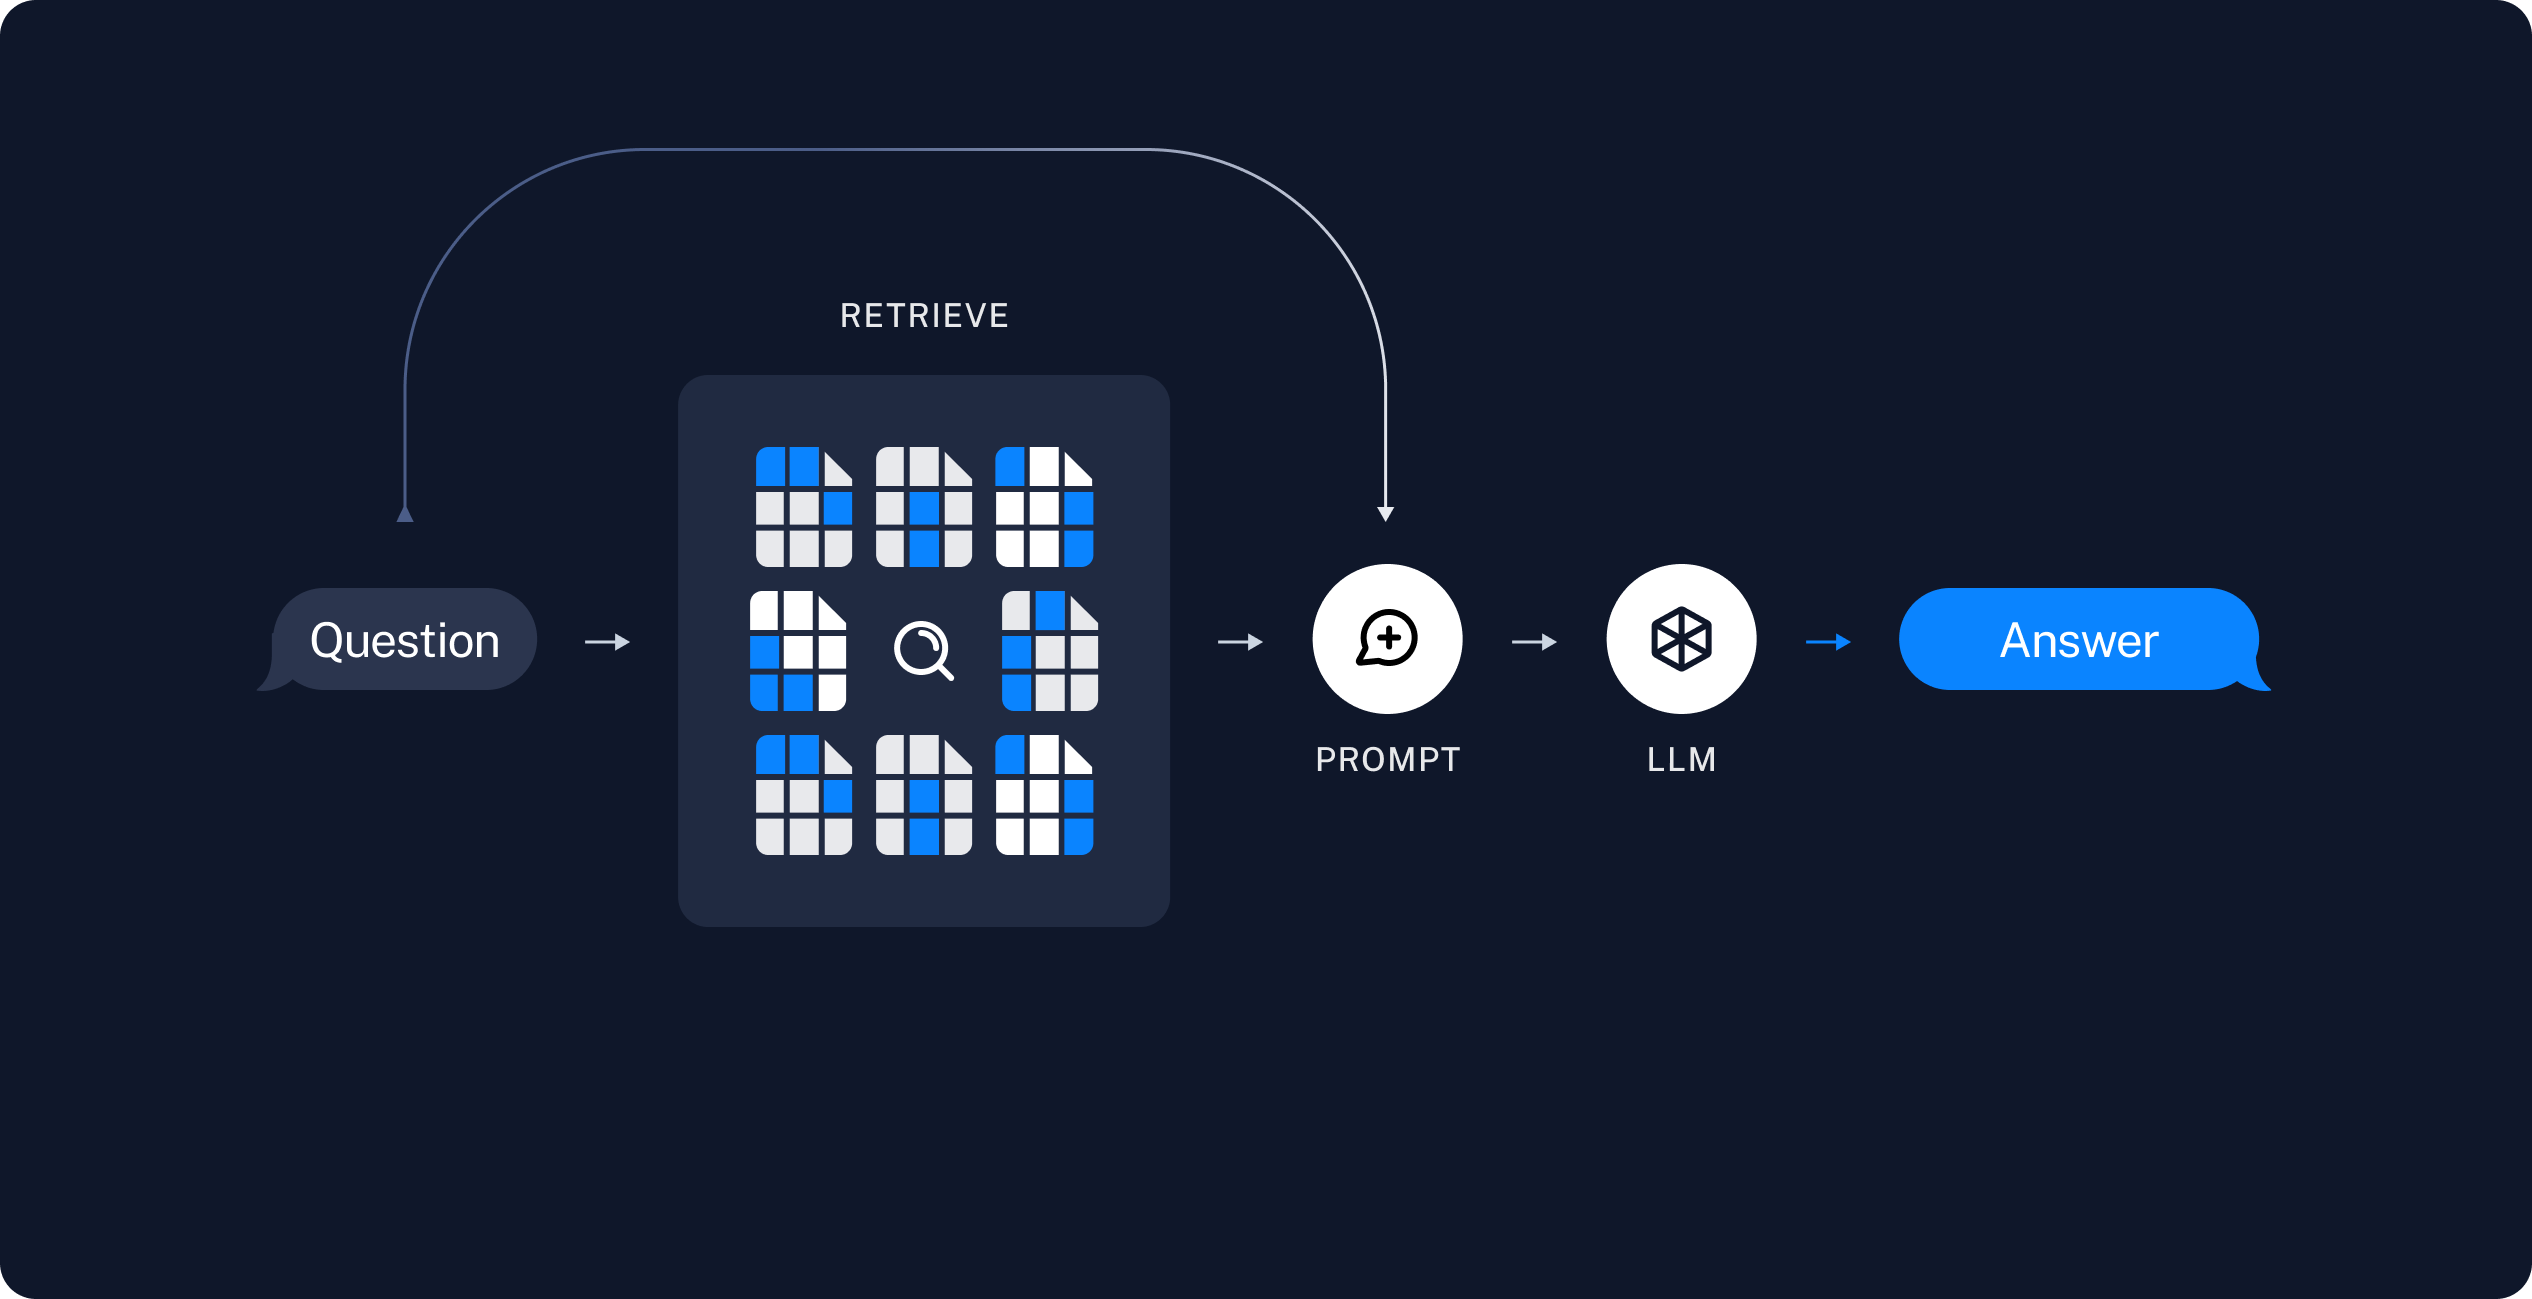

* Once we've **indexed our data**, we will use **LangGraph** as our orchestration framework to implement the retrieval and generation steps.
* It becomes crucial to be able to **inspect what exactly is going on inside your chain or agent**. The best way to do this is with **LangSmith**.

llama可以分为三个模块：embedding(语义相似度计算、机器学习模型输入)，chat_models(聊天机器人、对话系统),llms(文本生成、代码生成、翻译)



In [2]:
!pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph #ai agent framework
!pip install -qU langchain-openai #LLM api
!pip install -qU langchain-core # vector store
!!capture --no-stderr
!pip install --upgrade --quiet langgraph langchain-community beautifulsoup4

In [5]:
!pip install langchain_ollama==0.2.2

In [4]:
!export LANGSMITH_TRACING="true"
!export LANGSMITH_API_KEY="..."

In [9]:
import bs4
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader #langchain api
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core import vectorstores
# from langchain.embeddings.openai import OpenAIEmbeddings
# from langchain_community.vectorstores import FAISS
# from langchain_community.llms import ollama
# from langchain_community.chat_models import Chatollama
from langchain_ollama import OllamaLLM
from langchain_core.vectorstores import InMemoryVectorStore
import getpass

import os

##################################################################
# adding logic for incorporating historical messages

###set llama api key
if not os.environ.get("LLAMA_API_KEY"):
  os.environ["LLAMA_API_KEY"] =getpass.getpass("LA-579e40a2b79f4aba833d713b5bf11621dcbfe8f7a18a4d4ca27a6e6b6692475f")  # Replace with your actual API key
print("connecting llama sucesses")
model=OllamaLLM(model="llama3")

# vector store
embeddings = OllamaEmbeddings(model_name="llama3")
vector_store = InMemoryVectorStore(embeddings)

# model.invoke("Come up with 10 names for a song about parrots")


# # Load and chunk contents of the blog
loader = WebBaseLoader(
    web_paths=("https://lilianweng.github.io/posts/2023-06-23-agent/",),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("post-content", "post-title", "post-header")
        )
    ),
)
docs = loader.load()

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)

# # Initialize vector store
# embeddings = OpenAIEmbeddings()
# vector_store = FAISS.from_documents(all_splits, embeddings)  # 使用 FAISS 创建 vector_store

# # Index chunks
# _ = vector_store.add_documents(documents=all_splits)

# # Define prompt for question-answering
# prompt = hub.pull("rlm/rag-prompt")


# # Define state for application
# class State(TypedDict):
#     question: str
#     context: List[Document]
#     answer: str


# # Define application steps
# def retrieve(state: State):
#     retrieved_docs = vector_store.similarity_search(state["question"])
#     return {"context": retrieved_docs}


# def generate(state: State):
#     docs_content = "\n\n".join(doc.page_content for doc in state["context"])
#     messages = prompt.invoke({"question": state["question"], "context": docs_content})
#     response = llm.invoke(messages)
#     return {"answer": response.content}


# # Compile application and test
# graph_builder = StateGraph(State).add_sequence([retrieve, generate])
# graph_builder.add_edge(START, "retrieve")
# graph = graph_builder.compile()

connecting llama sucesses


NameError: name 'OllamaEmbeddings' is not defined